In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [162]:
cab_data= pd.read_csv('DataSets-main/Cab_Data.csv')
city = pd.read_csv('DataSets-main/City.csv')
customerid = pd.read_csv('DataSets-main/Customer_Id.csv')
transit=pd.read_csv("DataSets-main/Transaction_Id.csv")

#### Cab Dataset

In [163]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [164]:
datetime(1900,12,21)+timedelta(42377)

datetime.datetime(2016, 12, 29, 0, 0)

In [165]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


##### Performing Preprocessing on the data

In [166]:
from datetime import datetime ,timedelta

In [49]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: datetime.fromordinal(x).strftime('%d%m%Y'))

In [167]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [168]:
cab_data['Date of Travel']=cab_data['Date of Travel'].apply(lambda x:to_date_format(x))

In [169]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [170]:
cab_data['state']= cab_data.City.apply(lambda x : x.split(' ')[1] if (len(x.split()) < 3 ) else x.split(' ')[2])

In [74]:
#cab_data['State'] = cab_data.City.apply(lambda x : x.split(' ')[1])

In [171]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,state
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,GA
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,GA
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.632,GA
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.602,GA
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.776,GA


In [172]:
cab_data['City']=cab_data.City.apply(lambda x : x.split(' ')[0] if (len(x.split()) < 3 ) else "".join(x.split(' ',1)))

In [173]:
cab_data['City'] = cab_data.City.apply(lambda x : x.split(' ')[0])

In [174]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,state
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA


In [113]:
cab_data.State.value_counts()

YORK       99885
IL         56625
ANGELES    48033
DC         43737
MA         29692
DIEGO      20488
TX         11913
VALLEY      8519
WA          7997
GA          7557
FL          6454
AZ          3995
COUNTY      3982
CO          3825
TN          3010
CA          2367
PA          1313
Name: State, dtype: int64

In [79]:
cab_data.Company.value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

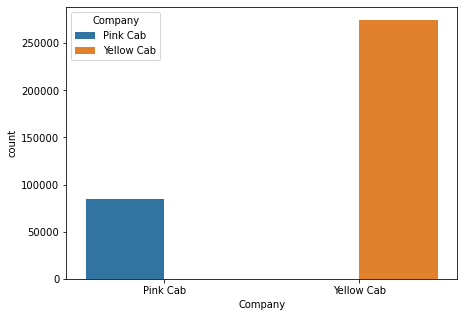

In [89]:
plt.figure(figsize=(7,5))
sns.countplot(x='Company',hue='Company',data=cab_data)
plt.show()

##### We have more data of the Yellow Cab 

<Figure size 504x360 with 0 Axes>

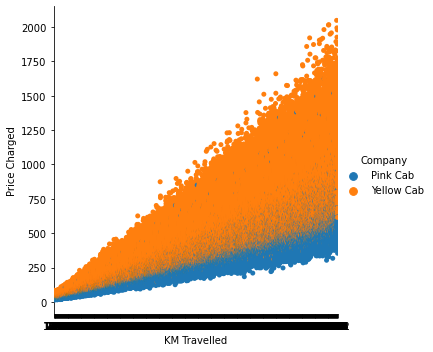

In [92]:
plt.figure(figsize=(15,15))
sns.catplot(x='KM Travelled', y='Price Charged',hue='Company',data=cab_data)
plt.show()

#### City Data

In [175]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [219]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
 3   state       20 non-null     object
dtypes: object(4)
memory usage: 768.0+ bytes


#### Data type conversion

In [220]:
city['Population'] = [x.replace(',','') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
state          object
dtype: object

In [176]:
city['state']= city.City.apply(lambda x : x.split(' ')[1] if (len(x.split()) < 3 ) else x.split(' ')[2])

In [177]:
city.City.apply(lambda x : "".join(x.split(' ',1)))

0          NEWYORK NY
1           CHICAGOIL
2       LOSANGELES CA
3             MIAMIFL
4       SILICONVALLEY
5        ORANGECOUNTY
6         SANDIEGO CA
7           PHOENIXAZ
8            DALLASTX
9           ATLANTAGA
10           DENVERCO
11           AUSTINTX
12          SEATTLEWA
13           TUCSONAZ
14    SANFRANCISCO CA
15       SACRAMENTOCA
16       PITTSBURGHPA
17       WASHINGTONDC
18        NASHVILLETN
19           BOSTONMA
Name: City, dtype: object

In [178]:
city['City']=city.City.apply(lambda x : x.split(' ')[0] if (len(x.split()) < 3 ) else "".join(x.split(' ',1)))

In [179]:
city.head()

,City,Population,Users,state
0,NEWYORK NY,"8,405,837","302,149",NY
1,CHICAGO,"1,955,130","164,468",IL
2,LOSANGELES CA,"1,595,037","144,132",CA
3,MIAMI,"1,339,155","17,675",FL
4,SILICON,"1,177,609","27,247",VALLEY


In [180]:
city['City']=city.City.apply(lambda x : x.split(" ")[0])

In [181]:
city.head()

,City,Population,Users,state
0,NEWYORK,"8,405,837","302,149",NY
1,CHICAGO,"1,955,130","164,468",IL
2,LOSANGELES,"1,595,037","144,132",CA
3,MIAMI,"1,339,155","17,675",FL
4,SILICON,"1,177,609","27,247",VALLEY


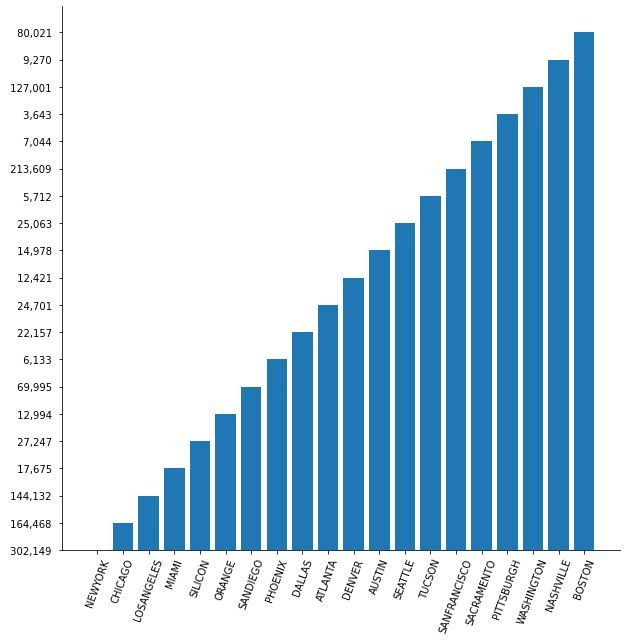

In [190]:
plt.figure(figsize=(10,10))
plt.bar(city.City,city.Users)
plt.xticks(rotation=70)
plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)
plt.show()

##### Boston has the highest users

<Figure size 1440x1440 with 0 Axes>

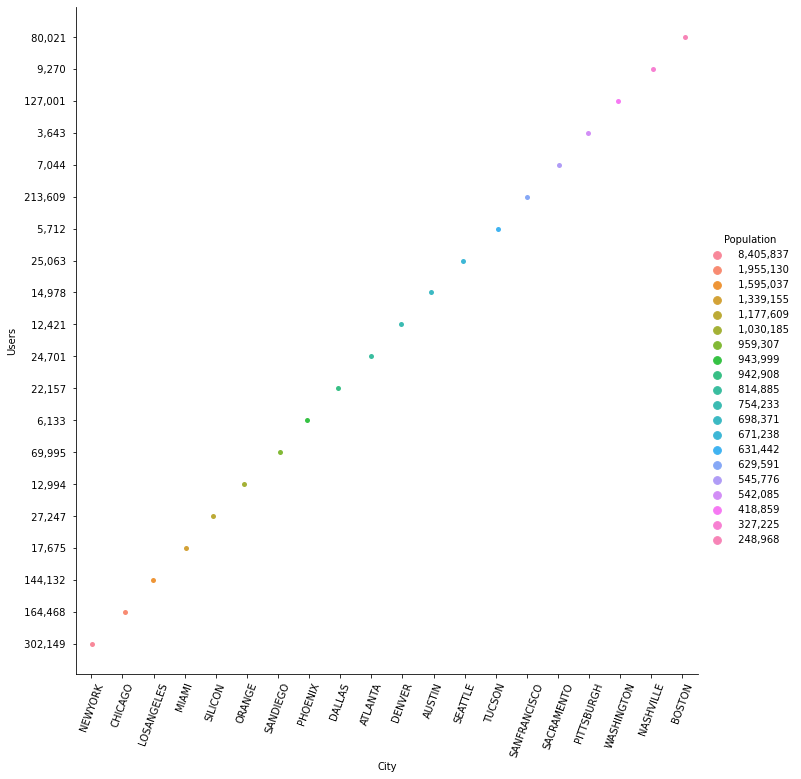

In [203]:
plt.figure(figsize=(20,20))
sns.catplot(x='City', y='Users',hue='Population',data=city,height=10)
plt.xticks(rotation=70)
plt.show()

#### Customer ID

In [204]:
customerid.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [205]:
customerid.shape

(49171, 4)

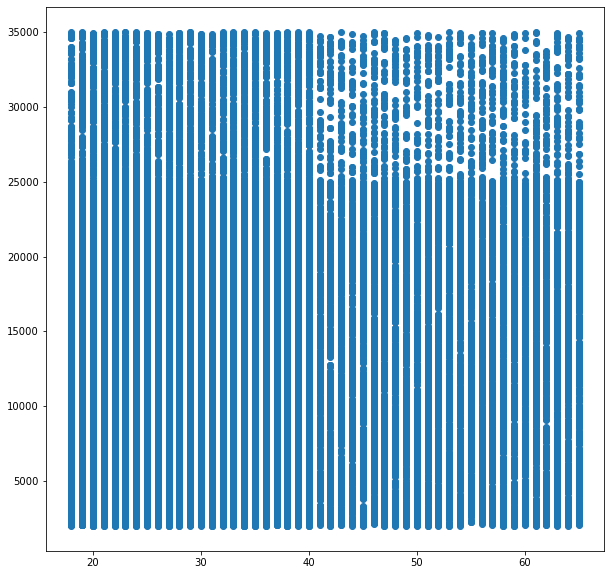

In [218]:
plt.figure(figsize=(10,10))
plt.scatter(customerid.Age,customerid['Income (USD/Month)'])
plt.show()

####  Transit Data

In [206]:
transit.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [222]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,state
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,GA
1,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,GA
2,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,GA
3,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,GA
4,10000015,2016-01-02,Pink Cab,ATLANTA,8.73,114.62,97.776,GA


In [227]:
master_data = cab_data.merge(transit, on='Transaction ID').merge(customerid , on='Customer ID').merge(city , on='City')

In [228]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,state_x,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,GA,29290,Card,Male,28,10813,814885.0,24701.0,GA
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,GA,29290,Cash,Male,28,10813,814885.0,24701.0,GA
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,GA,29290,Card,Male,28,10813,814885.0,24701.0,GA
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,GA,27703,Card,Male,27,9237,814885.0,24701.0,GA
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,GA,27703,Card,Male,27,9237,814885.0,24701.0,GA


In [234]:
master_data.drop('state_x',axis=1,inplace=True)

In [235]:
master_data.shape

(359392, 15)

In [236]:
master_data.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
state_y               0
dtype: int64

In [237]:
master_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


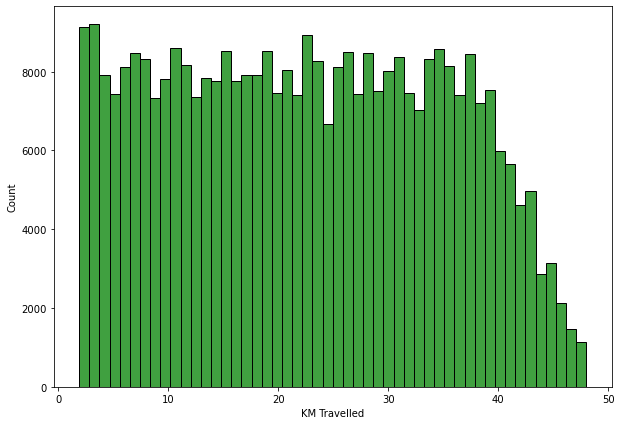

In [248]:
plt.figure(figsize= (10,7))
sns.histplot(x= 'KM Travelled' , data=master_data , bins=50 ,  color= 'g')
plt.show()

<Figure size 720x504 with 0 Axes>

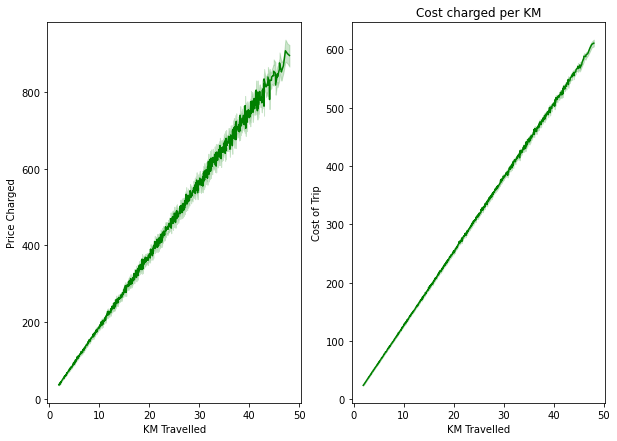

In [265]:
plt.figure(figsize= (10,7))
fig, ax = plt.subplots(1,2,sharex =True,figsize=(10,7))
sns.lineplot(x= 'KM Travelled' ,y='Price Charged', data=master_data  ,  color= 'g',ax=ax[0])
sns.lineplot(x= 'KM Travelled' ,y='Cost of Trip', data=master_data  ,  color= 'g',ax=ax[1])
plt.title("Cost charged per KM")
plt.show()

Text(0.5, 0, 'Age')

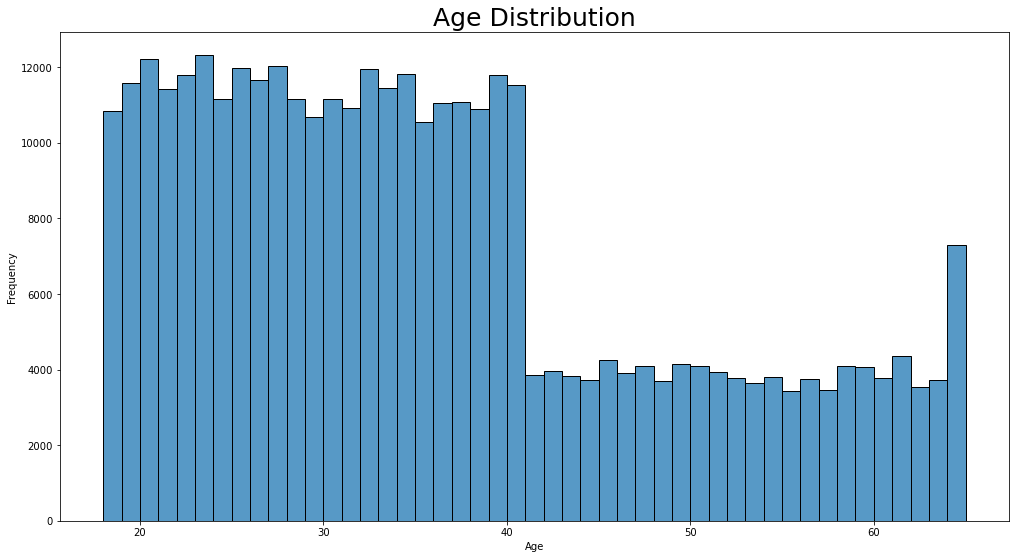

In [261]:
plt.figure(figsize=(17,9))
sns.histplot(data=master_data, x='Age', bins=47)
plt.title('Age Distribution', fontsize=25)
plt.ylabel('Frequency')
plt.xlabel('Age')

Text(0.5, 0, 'Payment Mode')

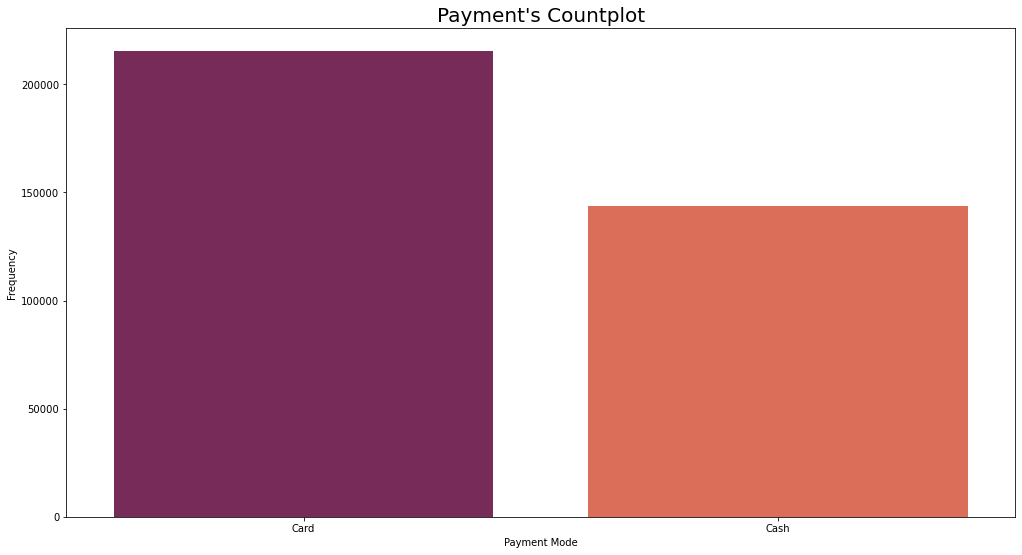

In [264]:
plt.figure(figsize=(17,9))
sns.countplot(data=master_data, x="Payment_Mode", palette='rocket')
plt.title("Payment's Countplot", fontsize=20)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')

##### Outlier detection

In [266]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users',
       'state_y'],
      dtype='object')

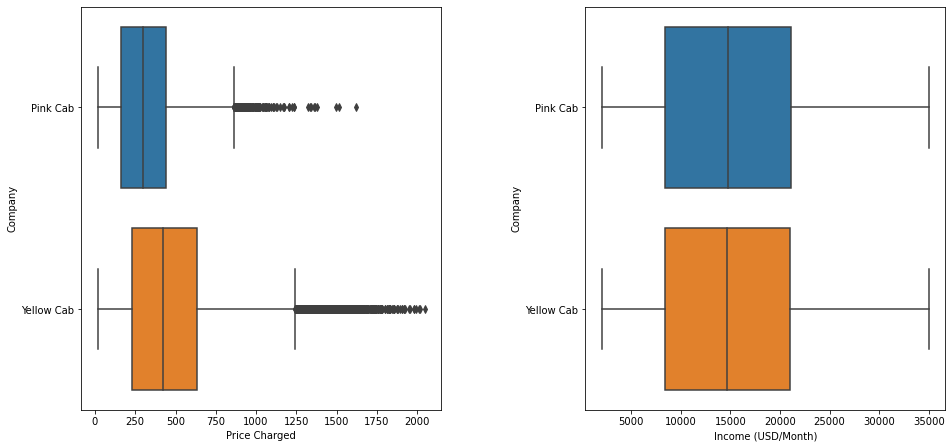

In [277]:
plt.figure(figsize=(15,7))


plt.subplot(1,2,1)
sns.boxplot(x='Price Charged' , y='Company' ,data= master_data)

plt.subplot(1,2,2)
sns.boxplot(x= 'Income (USD/Month)', y = 'Company' ,data=master_data)


plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 

plt.show()

#### Time series Data analysis

In [282]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'state_y',
       'Day Of Travel'],
      dtype='object')

In [285]:
master_data['Day Of Travel'] = master_data['Date of Travel'].dt.day
master_data['Month Of Travel'] =master_data['Date of Travel'].dt.month
master_data['Year Of Travel'] =master_data['Date of Travel'].dt.year

In [286]:
master_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA,7,1,2016
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,20,7,2018


In [288]:
master_data['Profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

In [290]:
master_data.head(2)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA,7,1,2016,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,20,7,2018,281.2772


In [294]:
Yellow_cab = master_data[master_data["Company"] == 'Yellow Cab']

In [295]:
Yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,20,7,2018,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA,22,11,2018,194.6480
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA,20,4,2018,253.9808
5,10324737,2018-05-03,Yellow Cab,ATLANTA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701.0,GA,3,5,2018,50.8912
8,10079404,2016-09-20,Yellow Cab,ATLANTA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885.0,24701.0,GA,20,9,2016,210.0920


In [296]:
Yellow_cab.shape

(274681, 19)

In [297]:
Pink_cab = master_data[master_data['Company'] == 'Pink Cab']

In [298]:
Pink_cab.shape

(84711, 19)

In [299]:
Pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885.0,24701.0,GA,7,1,2016,57.315
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885.0,24701.0,GA,5,1,2016,23.666
6,10395626,2018-10-26,Pink Cab,ATLANTA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885.0,24701.0,GA,26,10,2018,25.096
7,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885.0,24701.0,GA,1,1,2016,27.568
11,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885.0,24701.0,GA,6,1,2016,25.798


#### Yellow cab yearly profit

In [300]:
Yellow_cab.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'state_y',
       'Day Of Travel', 'Month Of Travel', 'Year Of Travel', 'Profit'],
      dtype='object')

In [305]:
Profit_compar = master_data.groupby(['Year Of Travel' , 'Company'])['Profit'].sum()

In [308]:
Profit_compar = Profit_compar.to_frame()

In [309]:
Profit_compar

Profit
Year Of Travel Company                 
2016           Pink Cab    1.739883e+06
               Yellow Cab  1.407389e+07
2017           Pink Cab    2.015101e+06
               Yellow Cab  1.646427e+07
2018           Pink Cab    1.552345e+06
               Yellow Cab  1.348222e+07

In [315]:
Price_compar = master_data.groupby(['Year Of Travel' , 'Company'])['Price Charged'].sum()

In [317]:
Price_compar = Price_compar.to_frame('Price')

In [318]:
Price_compar

Price
Year Of Travel Company                
2016           Pink Cab     7986269.04
               Yellow Cab  38833629.82
2017           Pink Cab     9530736.47
               Yellow Cab  45582913.86
2018           Pink Cab     8811245.82
               Yellow Cab  41437343.51

In [319]:
Price_compar['%Profit'] = (Profit_compar['Profit'] * 100) / Price_compar['Price']

In [322]:
Price_compar.reset_index(inplace=True)

In [323]:
Price_compar.head()

,Year Of Travel,Company,Price,%Profit
0,2016,Pink Cab,7986269.04,21.785926
1,2016,Yellow Cab,38833629.82,36.241491
2,2017,Pink Cab,9530736.47,21.143179
3,2017,Yellow Cab,45582913.86,36.119383
4,2018,Pink Cab,8811245.82,17.617770


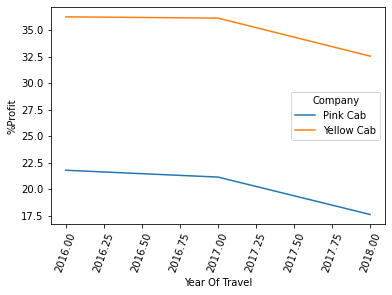

In [331]:
plt.figure()
sns.lineplot(x= "Year Of Travel" , y="%Profit" , hue = "Company"  , data=Price_compar)
plt.xticks(rotation=70)
plt.show()

In [332]:
round(master_data.groupby(['Company']).Profit.sum().to_frame('Total Profit'),0)

,Total Profit
Company,
Pink Cab,5307328.0
Yellow Cab,44020373.0


In [334]:
Pink_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,814885.0,24701.0,GA,7,1,2016,57.315
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,814885.0,24701.0,GA,5,1,2016,23.666
6,10395626,2018-10-26,Pink Cab,ATLANTA,13.39,167.03,141.934,27703,Card,Male,27,9237,814885.0,24701.0,GA,26,10,2018,25.096
7,10000013,2016-01-01,Pink Cab,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,814885.0,24701.0,GA,1,1,2016,27.568
11,10000014,2016-01-06,Pink Cab,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,814885.0,24701.0,GA,6,1,2016,25.798


In [350]:
Pink_cab.set_index('Date of Travel',inplace=True)

In [335]:
Yellow_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,20,7,2018,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA,22,11,2018,194.6480
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA,20,4,2018,253.9808
5,10324737,2018-05-03,Yellow Cab,ATLANTA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885.0,24701.0,GA,3,5,2018,50.8912
8,10079404,2016-09-20,Yellow Cab,ATLANTA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885.0,24701.0,GA,20,9,2016,210.0920


In [347]:
Yellow_cab.set_index('Date of Travel',inplace=True)

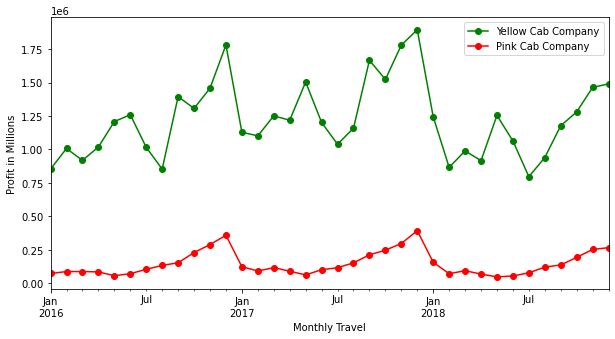

In [358]:
plt.figure(figsize=(10,5))

Yellow_cab.Profit.resample('M').sum().plot.line(label="Yellow Cab Company", marker='o' , color='green')
Pink_cab.Profit.resample('M').sum().plot.line(label="Pink Cab Company", marker='o' , color='red')
plt.xlabel("Monthly Travel")
plt.ylabel("Profit in Millions")
plt.legend(loc='best')
#plt.xticks(rotation=70)
plt.show()

In [361]:
y=Yellow_cab.Profit.resample('m').sum().to_frame('Profit')
p=Pink_cab.Profit.resample('m').sum().to_frame('Profit')

In [362]:
print('YellowCab Company mean monthly profit = ', round(y.Profit.mean(),1),"  and it's std deviation is = ",round(y.Profit.std(),2), 'so, the percentage of the deviation is', round((y.Profit.std() /y.Profit.mean())*100,2),'%')
print('PinkCab Company mean monthly profit = ', round(p.Profit.mean(),1),"  and it's std deviation is = ",round(p.Profit.std(),2), 'so, the percentage of the deviation is', round((p.Profit.std() /p.Profit.mean())*100,2),'%')

YellowCab Company mean monthly profit =  1222788.1   and it's std deviation is =  282187.72 so, the percentage of the deviation is 23.08 %
PinkCab Company mean monthly profit =  147425.8   and it's std deviation is =  90258.28 so, the percentage of the deviation is 61.22 %


#### Profit Per City

In [366]:
master_data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'state_y',
       'Day Of Travel', 'Month Of Travel', 'Year Of Travel', 'Profit'],
      dtype='object')

In [378]:
City_Profit = master_data.groupby(['Company','City'])['Profit'].sum()

In [379]:
City_Profit=City_Profit.to_frame()

In [382]:
City_Profit.reset_index(inplace=True)

In [383]:
City_Profit.head()

,Company,City,Profit
0,Pink Cab,ATLANTA,96050.076
1,Pink Cab,AUSTIN,147445.290
2,Pink Cab,BOSTON,262001.698
3,Pink Cab,CHICAGO,318722.488
4,Pink Cab,DALLAS,24730.112


<Figure size 1080x576 with 0 Axes>

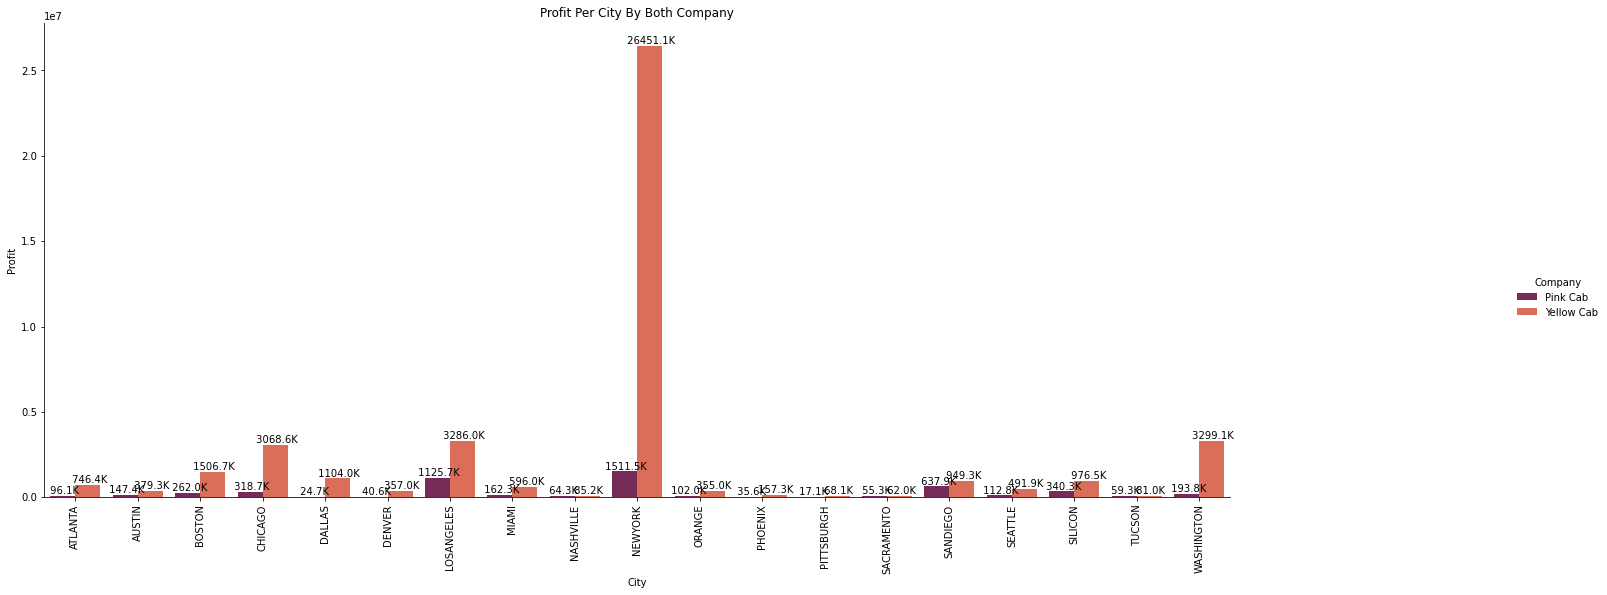

In [408]:
plt.figure(figsize=(15,8))

ax=sns.catplot(x='City',y='Profit',hue='Company',data=City_Profit,kind='bar',palette = 'rocket')
ax.fig.set_size_inches(25,8)
plt.title('Profit Per City By Both Company')
plt.xticks(rotation=90)
fig= ax.facet_axis(0,0)
for i in fig.containers:
    label = [f'{(v.get_height()/1000): .1f}K'for v in i]
    fig.bar_label(i,labels=label)
plt.show()

In [409]:
master_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,state_y,Day Of Travel,Month Of Travel,Year Of Travel,Profit
0,10000011,2016-01-07,Pink Cab,ATLANTA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0,GA,7,1,2016,57.3150
1,10351127,2018-07-20,Yellow Cab,ATLANTA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0,GA,20,7,2018,281.2772
2,10412921,2018-11-22,Yellow Cab,ATLANTA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0,GA,22,11,2018,194.6480
3,10000012,2016-01-05,Pink Cab,ATLANTA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0,GA,5,1,2016,23.6660
4,10320494,2018-04-20,Yellow Cab,ATLANTA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0,GA,20,4,2018,253.9808


In [427]:
Yellow_cab.groupby(['Company','Age'])['Customer ID'].count()

Company     Age
Yellow Cab  18     8170
            19     8770
            20     9376
            21     8841
            22     9013
            23     9414
            24     8481
            25     9159
            26     8761
            27     9292
            28     8620
            29     8003
            30     8579
            31     8389
            32     9118
            33     8803
            34     9036
            35     8135
            36     8520
            37     8344
            38     8390
            39     9013
            40     8802
            41     2998
            42     3090
            43     2921
            44     2822
            45     3268
            46     2977
            47     3170
            48     2855
            49     3183
            50     3167
            51     3046
            52     2849
            53     2755
            54     2927
            55     2630
            56     2899
            57     2612
            58     3119


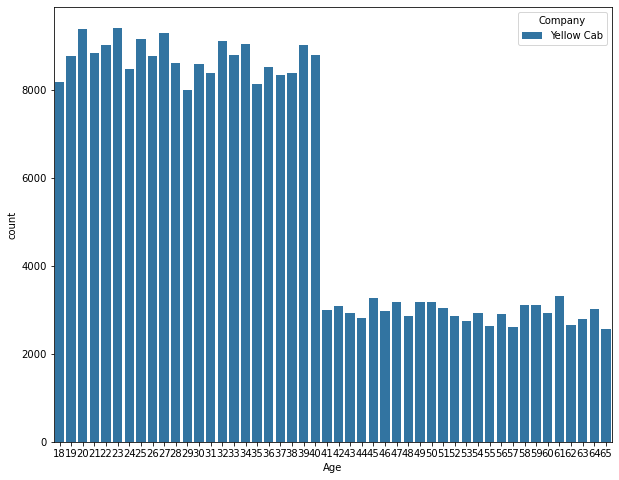

In [429]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',hue='Company',data=Yellow_cab)
plt.show()

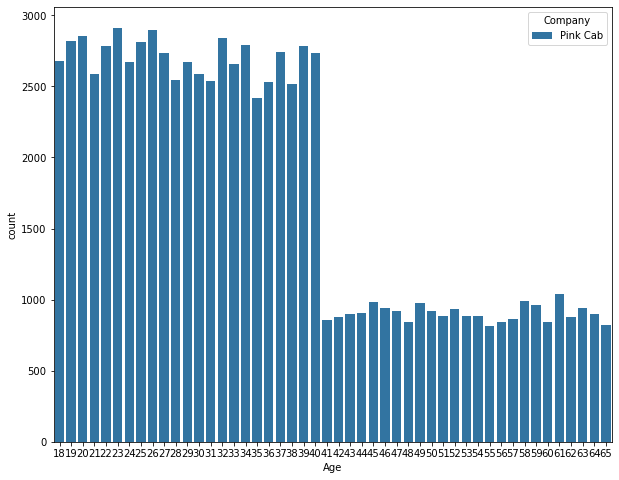

In [430]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',hue='Company',data=Pink_cab)
plt.show()

##### We can clearly see that Yellow cab company is more popular than Pink cab company